## 3-7-1

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#追記
import json
import datetime
import math

In [4]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()

In [5]:
def mplot(img, img2=None, img3=None, img4=None):

    imgs = [img, img2, img3, img4]
    
    for idx, tmp_img in enumerate(imgs):

        if tmp_img is None:
            continue
        tmp_img = tmp_img.astype(np.uint8)
        im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(imgs), idx+1)
        plt.imshow(im4p)

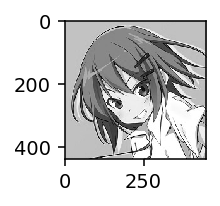

In [6]:
import cv2
import numpy as np

def main():
    img = cv2.imread("./sample/3-7/input.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst2 = cv2.resize(gray, (gray.shape[1]*2, gray.shape[0]*2 ), interpolation = cv2.INTER_NEAREST)

    mplot(dst2)
    return (dst2)
dst2_1 = main()

In [7]:
img = cv2.imread("./sample/3-7/input.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [8]:
lv(gray)



interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

In [9]:
%pdb on

Automatic pdb calling has been turned ON


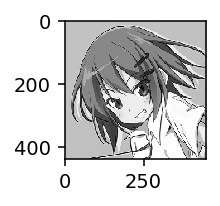

In [44]:
import cv2
import numpy as np

def resize_nearest(src, w, h):
    
    # 出力画像用の配列生成
    dst = np.empty((h, w))
    
    hi , wi = src.shape[0], src.shape[1]
    ax = w/ float(wi)
    ay = h/ float(hi)
    
    for y in range(0, h):
        for x in range(0, w):
            xi, yi = int (round(x/ax)), int(round(y/ay))
            if xi > (wi -1) : 
                xi = wi -1
            if yi > hi -1 :
                yi = hi -1
            
            dst[y][x] = src[yi][xi]
    return dst

def main():
    
    img = cv2.imread("./sample/3-7/input.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst1 = resize_nearest(gray, gray.shape[1]*2, gray.shape[0]*2)
    mplot(dst1)
    return (dst1)

dst2_2 = main()

In [45]:
lv(dst2_1, dst2_2)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

### 3-7-2

In [12]:
import cv2
import numpy as np

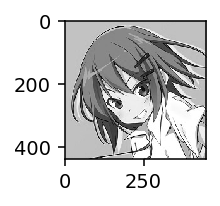

In [23]:
def main():
    img = cv2.imread("./sample/3-7/input.jpg")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dst2 = cv2.resize(gray, (gray.shape[1]*2, gray.shape[0]*2), interpolation= cv2.INTER_LINEAR )
    
    mplot(dst2_1)
    return (dst2_1)

dst372_1 = main()

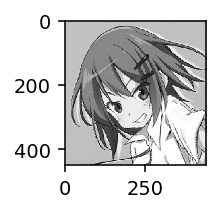

In [24]:
import cv2
import numpy as np


def resize_bilinear(src, hd, wd):
    dst = np.empty((hd, wd))
    h, w = src.shape[0], src.shape[1]
    
    ax = wd/ float(w)
    ay = hd/ float(h)
    
    for yd in range(0, hd):
        for xd in range(0, wd):
            x, y = xd/ax, yd/ay
            ox, oy = int(x), int(y)
            
            if ox > w-2: ox = w-2
            if oy > h-2: oy = h-2
                
            dx = x - ox
            dy = y - oy
            dst[yd][xd] = (1-dx)* (1-dy) * src[oy][ox] + dx * (1-dy) * src[oy][ox+1] + (1-dx) * dy * src[oy][ox+1] + dx*dy *src[oy+1][ox+1]
            
    return dst
        
def main():
    img = cv2.imread("sample/3-7/input.jpg")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst1 = resize_bilinear(gray, gray.shape[1]*2, gray.shape[0]*2)
    
    mplot(dst1)
    return (dst1)

dst372_2 = main()

In [25]:
lv(dst372_1, dst372_2)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

## 3-7-3

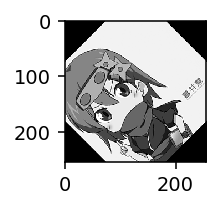

In [41]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-7/input.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    theta = 45
    scale = 1.0
    
    oy, ox = int(gray.shape[0]/ 2), int(gray.shape[1]/2)
    
    R = cv2.getRotationMatrix2D((ox, oy), theta, scale)
    dst = cv2.warpAffine(gray, R, gray.shape, flags= cv2.INTER_CUBIC)
    
    mplot(dst)
    return (dst)
    
dst373_1 = main()

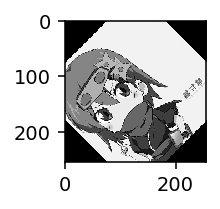

In [42]:
import cv2
import numpy as np

def rotate_affine(src, theta, tx=0, ty =0):
    h,w = src.shape[0], src.shape[1]
    
    dst = np.zeros((h, w))
    rd = np.radians(theta)
    
    for y in range(0, h):
        for x in range(0, w):
            xi = (x - tx)*np.cos(rd) - (y - ty)*np.sin(rd)+ tx
            yi = (x - tx)*np.sin(rd) + (y - ty)*np.cos(rd)+ ty
            xi = int(xi)
            yi = int(yi)
            
            if yi < h-1 and xi < w-1 and yi > 0 and xi >0:
                dst[y][x] = src[yi][xi]
    return dst

def main():
    img = cv2.imread("sample/3-7/input.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    theta = 45
    
    oy, ox = int(gray.shape[0]/2), int(gray.shape[1]/2)

    dst = rotate_affine(gray, theta, ox, oy)
    
    mplot(dst)

    return (dst)

dst373_2 = main()
    
    

In [43]:
lv(dst373_1 ,dst373_2)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…